In [1]:
import pandas as pd #allows reading tabular and multi-dimentional data
import matplotlib.pyplot as plt #visulisation package
import seaborn as sns #visulisation package
import numpy as np #linear algebra
from string import ascii_letters #helps searching for a specifit charactor(s) in string 
import math
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("../input/stack-overflow-developer-2020-survey/Dev_survey_data.csv",index_col="Respondent")
df_schema= pd.read_csv("../input/stack-overflow-developer-2020-survey/survey_results_schema.csv", index_col= "Column")
df.rename(columns={"ConvertedComp": "Salary_USD"}, inplace=True)
pd.set_option("Display.max_columns", 21)
pd.set_option("Display.max_rows", 61)
df.drop(columns=["CompTotal","CompFreq","CurrencyDesc","CurrencySymbol"], inplace=True)

In [3]:
#Code from https://www.kaggle.com/yashvi/data-analyst-jobs-visualization#Revenue-of-different-Industries
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

# Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [4]:
missing_values_table(df)

Your selected dataframe has 56 columns.
There are 56 columns that have missing values.


,Missing Values,% of Total Values
Salary_USD,29705,46.1
NEWPurchaseResearch,27140,42.1
PurchaseWhat,25097,38.9
WebframeDesireNextYear,24437,37.9
MiscTechWorkedWith,24147,37.5
NEWJobHuntResearch,23439,36.4
WorkWeekHrs,23310,36.2
NEWDevOpsImpt,22729,35.3
WebframeWorkedWith,22182,34.4
NEWJobHunt,22175,34.4


There are quite a lot of missing data from Salary_USD & NEWPurchaseResearch columns but we should be fine.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64461 entries, 1 to 65112
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MainBranch                    64162 non-null  object 
 1   Hobbyist                      64416 non-null  object 
 2   Age                           45446 non-null  float64
 3   Age1stCode                    57900 non-null  object 
 4   Salary_USD                    34756 non-null  float64
 5   Country                       64072 non-null  object 
 6   DatabaseDesireNextYear        44070 non-null  object 
 7   DatabaseWorkedWith            49537 non-null  object 
 8   DevType                       49370 non-null  object 
 9   EdLevel                       57431 non-null  object 
 10  Employment                    63854 non-null  object 
 11  Ethnicity                     45948 non-null  object 
 12  Gender                        50557 non-null  object 
 13  J

Yearscode and years coded pro columns are objects so we will investigate the reasons why this is happening

In [6]:
df["YearsCode"].value_counts()

10                    4510
5                     4249
6                     3834
7                     3477
8                     3407
4                     3254
3                     2951
15                    2586
20                    2562
12                    2453
9                     2344
2                     1916
11                    1691
14                    1479
13                    1468
25                    1338
16                    1203
30                    1114
18                    1089
17                    1057
1                      902
22                     792
Less than 1 year       757
19                     657
35                     599
23                     572
21                     550
40                     535
24                     449
26                     378
27                     335
28                     314
32                     309
38                     289
37                     258
36                     246
33                     236
3

We'll have to change these two objects to integers. More than 50 years experience sounds a bit suspecious as software development began in the late 1960s according to "Wikipedia" website

In [9]:
df["YearsCode"].replace(to_replace="More than 50 years", value=51, inplace=True)
df["YearsCode"].replace(to_replace="Less than 1 year", value=0, inplace=True)
df["YearsCode"].value_counts()

10    4510
5     4249
6     3834
7     3477
8     3407
4     3254
3     2951
15    2586
20    2562
12    2453
9     2344
2     1916
11    1691
14    1479
13    1468
25    1338
16    1203
30    1114
18    1089
17    1057
1      902
22     792
0      757
19     657
35     599
23     572
21     550
40     535
24     449
26     378
27     335
28     314
32     309
38     289
37     258
36     246
33     236
34     230
29     178
39     155
31     154
51     143
42     127
45     108
41      99
43      92
44      69
46      44
50      42
48      35
47      27
49      21
Name: YearsCode, dtype: int64

In [10]:
df["YearsCodePro"].replace(to_replace="More than 50 years", value=int(51), inplace=True)
df["YearsCodePro"].replace(to_replace="Less than 1 year", value=int(0), inplace=True)


In [11]:
df["Age1stCode"].replace(to_replace="Younger than 5 years", value=int(4), inplace=True)
df["Age1stCode"].replace(to_replace="Older than 85", value=int(86), inplace=True)

In [12]:
df = df.astype({"YearsCode": float, "YearsCodePro": float, "Age1stCode": float})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64461 entries, 1 to 65112
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MainBranch                    64162 non-null  object 
 1   Hobbyist                      64416 non-null  object 
 2   Age                           45446 non-null  float64
 3   Age1stCode                    57900 non-null  float64
 4   Salary_USD                    34756 non-null  float64
 5   Country                       64072 non-null  object 
 6   DatabaseDesireNextYear        44070 non-null  object 
 7   DatabaseWorkedWith            49537 non-null  object 
 8   DevType                       49370 non-null  object 
 9   EdLevel                       57431 non-null  object 
 10  Employment                    63854 non-null  object 
 11  Ethnicity                     45948 non-null  object 
 12  Gender                        50557 non-null  object 
 13  J

Now that all the numerical columns have float64 or int64 dtype, we can start our analysis!

In [14]:
df.describe()

,Age,Age1stCode,Salary_USD,WorkWeekHrs,YearsCode,YearsCodePro
count,45446.000000,57900.000000,3.475600e+04,41151.000000,57684.000000,46349.000000
mean,30.834111,15.410345,1.037561e+05,40.782174,12.709053,8.491812
std,9.585392,5.292925,2.268853e+05,17.816383,9.717353,7.905296
min,1.000000,4.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,24.000000,12.000000,2.464800e+04,40.000000,6.000000,3.000000
50%,29.000000,15.000000,5.404900e+04,40.000000,10.000000,6.000000
75%,35.000000,18.000000,9.500000e+04,44.000000,17.000000,12.000000
max,279.000000,86.000000,2.000000e+06,475.000000,51.000000,51.000000


We have some obvious outliers like working 475 h/w, someone is 279 years(apparently), and 86 when first started coding! For a better accuracy, these outliers should be illuminated. 

In [15]:
df["WorkWeekHrs"]= df["WorkWeekHrs"][df["WorkWeekHrs"].between(df["WorkWeekHrs"].mean(), df["WorkWeekHrs"].quantile(.85)+20)]
df["Age1stCode"]= df["Age1stCode"][df["Age1stCode"].between(df["Age1stCode"].mean(), df["Age1stCode"].quantile(.85)+15)]
high_age=df["Age"]>80 
high_age.value_counts()

False    64432
True        29
Name: Age, dtype: int64

In [16]:
df["Age"]= df["Age"][df["Age"].between(df["Age"].quantile(.15), df["Age"].quantile(.85)+45)]#removing the rows in Age column for anyone that declared they are over80 years old

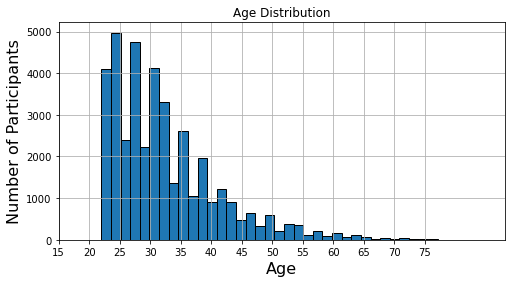

In [17]:
plt.subplots(figsize=(8,4))
df["Age"].hist(bins=40,edgecolor="black")
plt.xticks(list(range(15,80,5)))
plt.title("Age Distribution")
plt.ylabel("Number of Participants", fontsize=16)
plt.xlabel("Age", fontsize=16)
plt.show() 

The majority of respondants are between 22 to 50 years old.

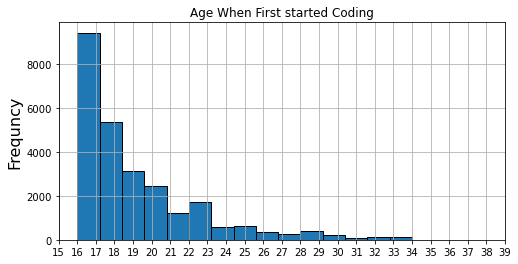

In [18]:
plt.subplots(figsize=(8,4))
df["Age1stCode"].hist(bins=15,edgecolor="black")
plt.xticks(list(range(15,40,1)))
plt.title("Age When First started Coding")
plt.ylabel("Frequncy", fontsize=16)
plt.show() 

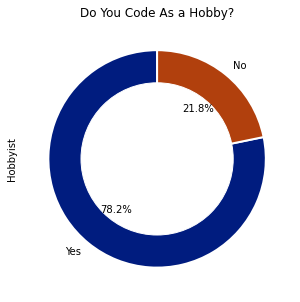

In [20]:
plt.subplots(figsize=(5,5))
data=df["Hobbyist"]
data.value_counts().plot.pie(autopct='%1.1f%%',colors=sns.color_palette("dark",5),startangle=90,wedgeprops = { "linewidth" : 2, "edgecolor" : "white"})
plt.title("Do You Code As a Hobby?")
my_circle=plt.Circle((0,0), 0.7, color="white")
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [21]:
df["Gender"].value_counts()

Man                                                            46013
Woman                                                           3844
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         76
Woman;Man;Non-binary, genderqueer, or gender non-conforming       26
Name: Gender, dtype: int64

I really don't like doing this next step but for the sake of simplicity, I will put any other genders else than man and woman into one catagory. Gender is fluid and there are more than two genders out there. But we will do what's best for our analysis.

In [22]:
df["Gender"] = df["Gender"].str.split(',').str[0]
df["Gender"].replace({'Man;Non-binary': "Non-binary/Other", 'Woman;Man': "Non-binary/Other", 'Woman;Man;Non-binary': "Non-binary/Other", 'Woman;Non-binary': "Non-binary/Other","Non-binary":"Non-binary/Other"},inplace=True)

Converting the salary to pound sterling.

In [23]:
def USD_GBP(x):
    return x * float(0.72)#the rate as of 19th of March
df["Salary_USD"] = df["Salary_USD"].apply(USD_GBP)
df.rename(columns={"Salary_USD": "Salary_GBP"}, inplace=True)

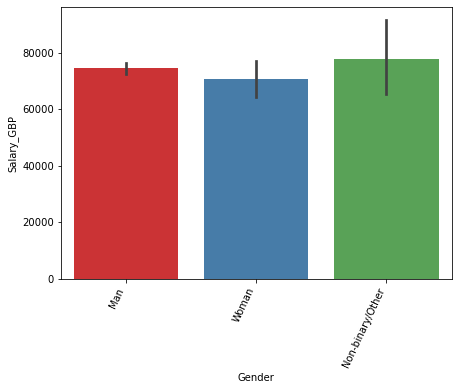

In [24]:
plt.figure(figsize=(7,5))
chart = sns.barplot(
    data=df,
    x="Gender",
    y="Salary_GBP",
    palette="Set1"
)
chart=chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment="right" 
)

In [25]:
df["Gender"].value_counts(normalize=True)

Man                 0.910121
Woman               0.076033
Non-binary/Other    0.013846
Name: Gender, dtype: float64

The error bar in the non-binary is rather large so therefore not very reliable. Men seem to be earning a bit more than women on average. But given that less than 1% of our data has been accumulated from people who identify themselves a woman, it can be easily argued that there is not enough data to support our claim.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


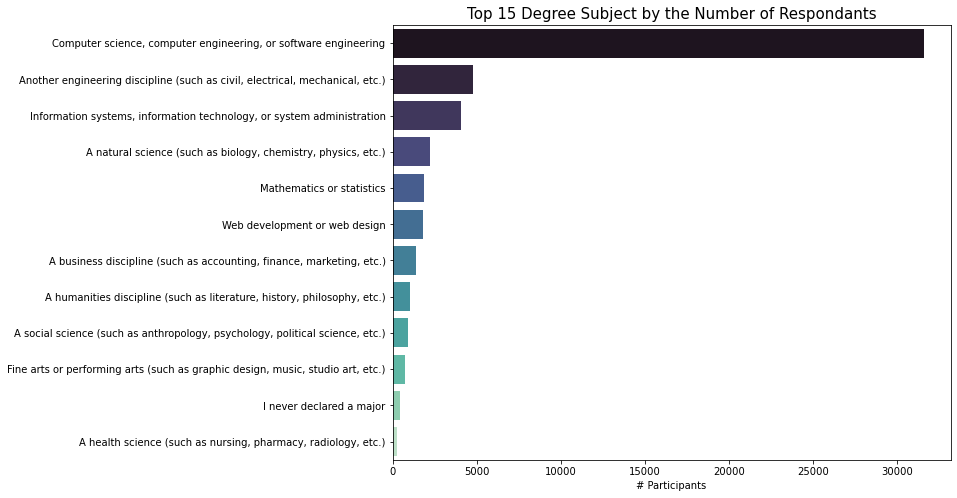

In [26]:
plt.subplots(figsize=(10,8))
coun_deg=df["UndergradMajor"].value_counts()[:15].sort_values(ascending=False).to_frame()
sns.barplot(coun_deg.UndergradMajor,coun_deg.index,palette="mako")
plt.title("Top 15 Degree Subject by the Number of Respondants",size=15)
plt.xlabel("# Participants", size=10)
plt.show() 

Unsurprisingly, the majority have studied a computer science or a computer-related degree. I definitely expected more people from a mathematical background, though.

In [27]:
salary=df[["Salary_GBP","Gender","Country","DevType","UndergradMajor","EdLevel"]].dropna()
sal_ed=salary.groupby("UndergradMajor")["Salary_GBP"].median().to_frame().sort_values(by="Salary_GBP",ascending=False).head(20)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


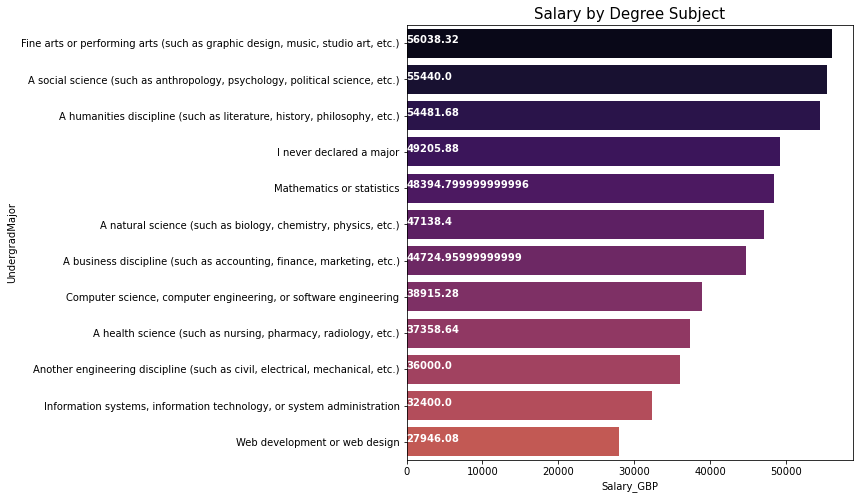

In [28]:
ax=sns.barplot(sal_ed.Salary_GBP,sal_ed.index,palette=sns.color_palette("inferno",20))
plt.title("Salary by Degree Subject",size=15)
for i, v in enumerate(sal_ed.Salary_GBP): 
    ax.text(.5, i, v,fontsize=10,color="white",weight="bold")
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

This is super interesting!!Although it can be argued that a design degree is somewhat relavant to the field of computer science, social sciences, perfoming arts, and humanities discipline are completely irrelevant in programming. Yet people from these backgrounds are amonsts the highest earners!

In [29]:
df["Sexuality"] = df["Sexuality"].str.split(";").str[0]
df["Sexuality"].value_counts(normalize=True)

Straight / Heterosexual    0.913211
Bisexual                   0.056556
Gay or Lesbian             0.024573
Queer                      0.005660
Name: Sexuality, dtype: float64

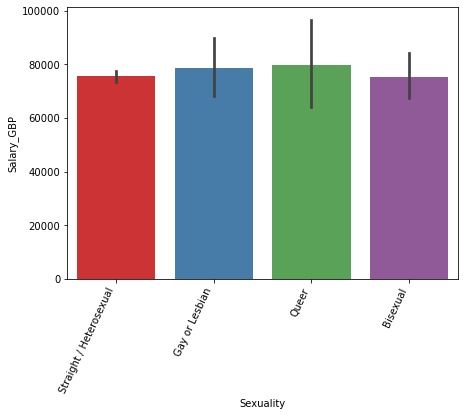

In [30]:
plt.figure(figsize=(7,5))
chart = sns.barplot(
    data=df,
    x="Sexuality",
    y="Salary_GBP",
    palette="Set1"
)
chart=chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment="right" 
)

Despite our plot indicating that people who identify themselves as "straight" might earn less than other sexual identities, we simply dont have enough data to support this claim! The large error bar is also hinting that our graph might not be very reliable.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


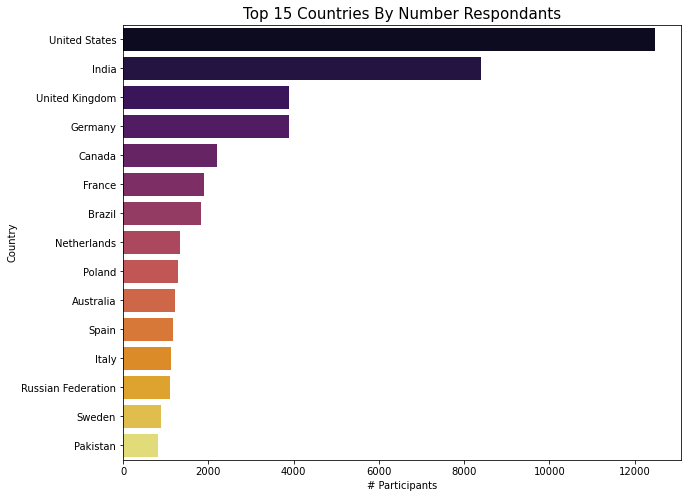

In [31]:
plt.subplots(figsize=(10,8))
coun=df["Country"].value_counts()[:15].sort_values(ascending=False).to_frame()
sns.barplot(coun.Country,coun.index,palette='inferno')
plt.title("Top 15 Countries By Number Respondants",size=15)
plt.ylabel("Country", size=10)
plt.xlabel("# Participants", size=10)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


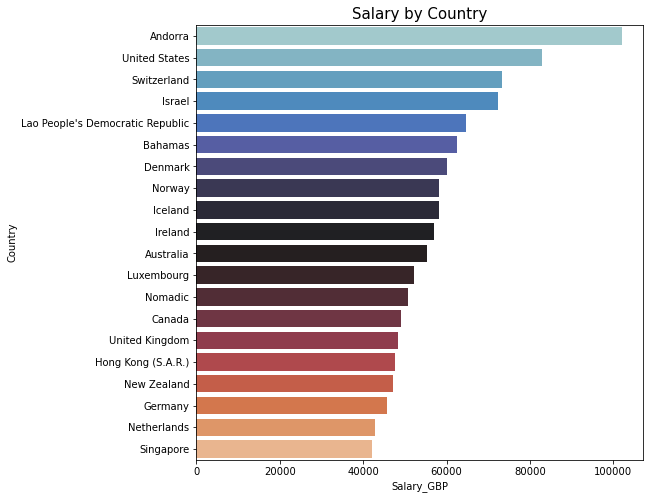

In [32]:
salary=df[["Age","Salary_GBP","Country","DevType","YearsCode", "YearsCodePro"]].dropna()
sal_job=salary.groupby("Country")["Salary_GBP"].median().to_frame().sort_values(by="Salary_GBP",ascending=False).head(20)
ax=sns.barplot(sal_job.Salary_GBP,sal_job.index,palette=sns.color_palette("icefire",20))
plt.title("Salary by Country",size=15)
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

In [33]:
countries=["Andorra", "Lao People's Democratic Republic", "Nomadic", "Bahamas", "Luxembourg", "Hong Kong (S.A.R.)", "Denmark", "Finland"]
country_filter=df["Country"].isin(countries)
df.loc[country_filter, ["Country"]].value_counts()

Country                         
Denmark                             397
Finland                             349
Hong Kong (S.A.R.)                  111
Luxembourg                           42
Nomadic                              31
Andorra                              13
Lao People's Democratic Republic      7
Bahamas                               3
dtype: int64

Again, we cannot really rely on the data from Luxembourg, Nomadic, Andorra, Lao or Bahamas as we simply have insufficient evidence to prove these countries are amongst highest payers.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


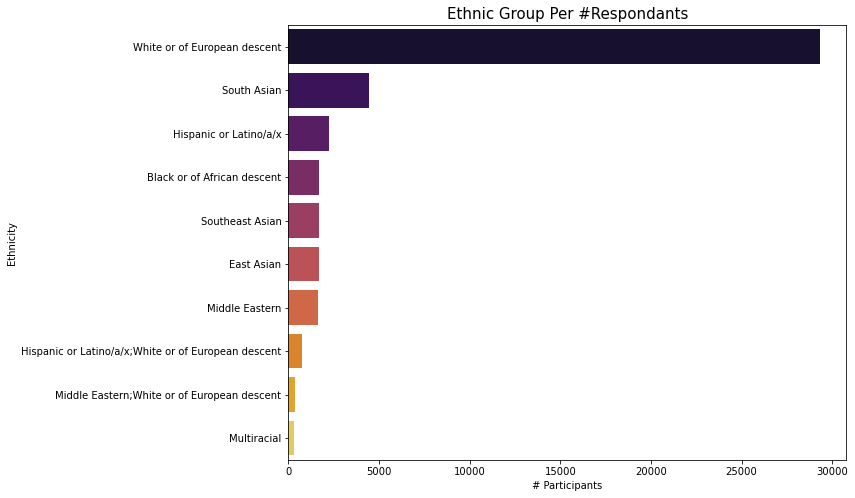

In [34]:
plt.subplots(figsize=(10,8))
coun=df["Ethnicity"].value_counts()[:10].sort_values(ascending=False).to_frame()
sns.barplot(coun.Ethnicity,coun.index,palette='inferno')
plt.title("Ethnic Group Per #Respondants",size=15)
plt.ylabel("Ethnicity", size=10)
plt.xlabel("# Participants", size=10)
plt.show()

In [35]:
df["DevType"].value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                          4424
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                            3086
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                                  

We need to tidy up this colum as it is very messy.

In [36]:
df["DevType"] = df["DevType"].str.split(',').str[0]
df["DevType"].value_counts().head(20)

Developer                                                                           32348
Designer;Developer                                                                   2838
Database administrator;Developer                                                     2607
Academic researcher;Developer                                                        1126
Data scientist or machine learning specialist;Developer                              1046
Database administrator;Designer;Developer                                             914
Data or business analyst;Developer                                                    878
Data or business analyst;Database administrator;Developer                             560
Data scientist or machine learning specialist                                         369
Academic researcher;Data scientist or machine learning specialist;Developer           340
Engineer                                                                              303
Data or bu

In [37]:
df["DevType"] = df["DevType"].str.split(";").str[0]
df["DevType"].value_counts().head(20)

Developer                                        32348
Database administrator                            3687
Academic researcher                               3552
Data or business analyst                          3370
Designer                                          2963
Data scientist or machine learning specialist     1936
DevOps specialist                                  389
Engineer                                           303
Engineering manager                                228
System administrator                               160
Senior executive/VP                                118
Product manager                                     95
Scientist                                           86
Educator                                            83
Marketing or sales professional                     52
Name: DevType, dtype: int64

**Much better!**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


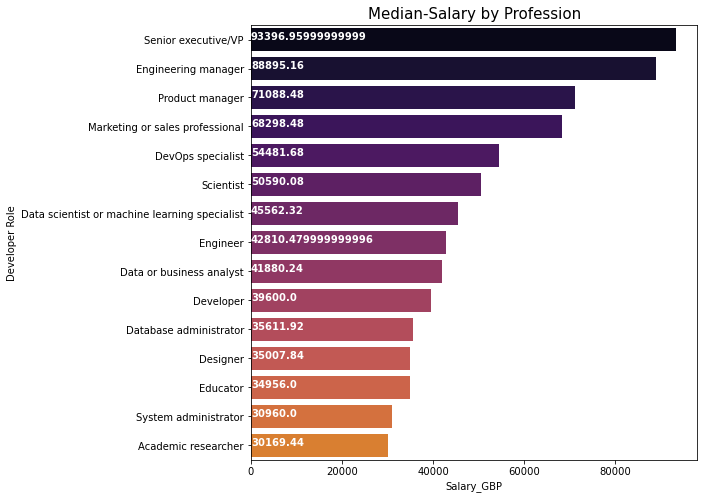

In [40]:
salary=df[["Salary_GBP","Gender","Country","DevType","EdLevel"]].dropna()
sal_job=salary.groupby("DevType")["Salary_GBP"].median().to_frame().sort_values(by="Salary_GBP",ascending=False).head(20)
ax=sns.barplot(sal_job.Salary_GBP,sal_job.index,palette=sns.color_palette('inferno',20))
plt.title("Median-Salary by Profession",size=15)
plt.ylabel("Developer Role")
for i, v in enumerate(sal_job.Salary_GBP): 
    ax.text(.5, i, v,fontsize=10,color='white',weight='bold')
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


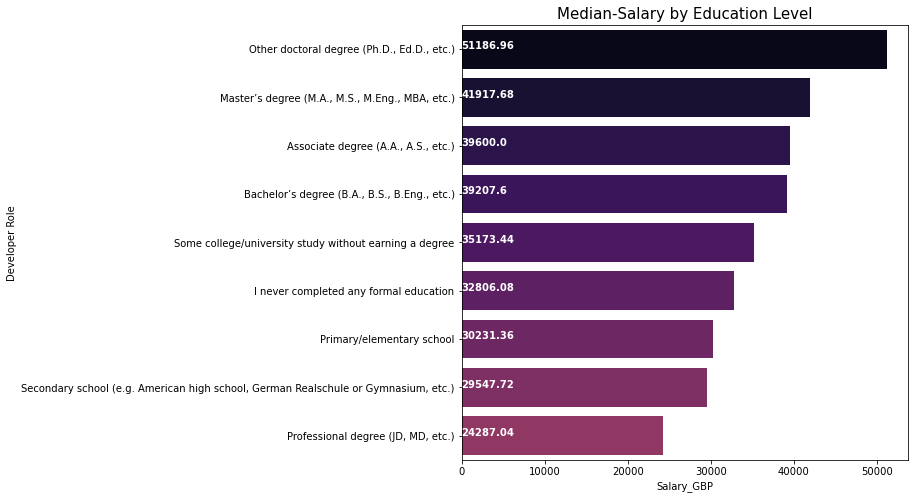

In [41]:
sal_ed=salary.groupby("EdLevel")["Salary_GBP"].median().to_frame().sort_values(by="Salary_GBP",ascending=False).head(20)
ax=sns.barplot(sal_ed.Salary_GBP,sal_ed.index,palette=sns.color_palette("inferno",20))
plt.title("Median-Salary by Education Level",size=15)
plt.ylabel("Developer Role")
for i, v in enumerate(sal_ed.Salary_GBP): 
    ax.text(.5, i, v,fontsize=10,color='white',weight='bold')
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

It is no surprise that you will earn more if you have higher qualifications and evidently, it's clear to see that here.

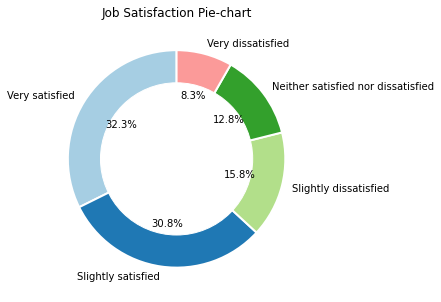

In [42]:
plt.subplots(figsize=(5,5))
data=df["JobSat"]
data.value_counts().plot.pie(autopct='%1.1f%%',colors=sns.color_palette('Paired',10),startangle=90,wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
plt.title("Job Satisfaction Pie-chart")
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.ylabel('')
plt.show()

Really impressive results in my opinion!Only 8.3% didn't like their job.

In [43]:
df["OrgSize"].value_counts()  

20 to 99 employees                                    9597
100 to 499 employees                                  8311
10,000 or more employees                              6149
1,000 to 4,999 employees                              4863
2 to 9 employees                                      4409
10 to 19 employees                                    4127
500 to 999 employees                                  2880
Just me - I am a freelancer, sole proprietor, etc.    2190
5,000 to 9,999 employees                              1808
Name: OrgSize, dtype: int64

In [44]:
df["OrgSize"].replace({"Just me - I am a freelancer, sole proprietor, etc.": "Self-employed"},inplace=True)

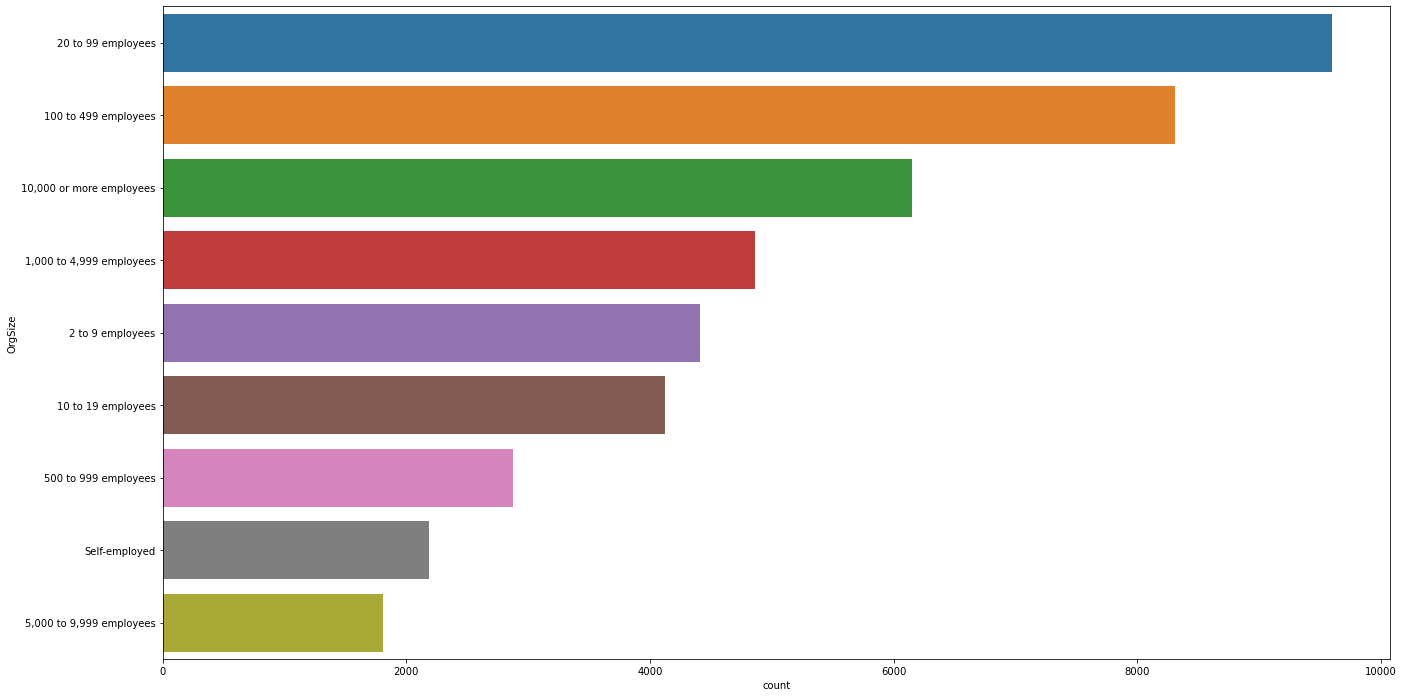

In [45]:
plt.subplots(figsize=(22,12))
sns.countplot(y=df["OrgSize"],order=df["OrgSize"].value_counts().index)
plt.show()

There is definitely a real mix of data here. But, the majority seem to be working for smaller organisations with less that 500 employees!

In [46]:
salary=df[["Salary_GBP","OrgSize","YearsCode", "YearsCodePro"]].dropna()
sal_org=salary.groupby("OrgSize")["Salary_GBP"].mean().to_frame().sort_values(by="Salary_GBP",ascending=False).head(20)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


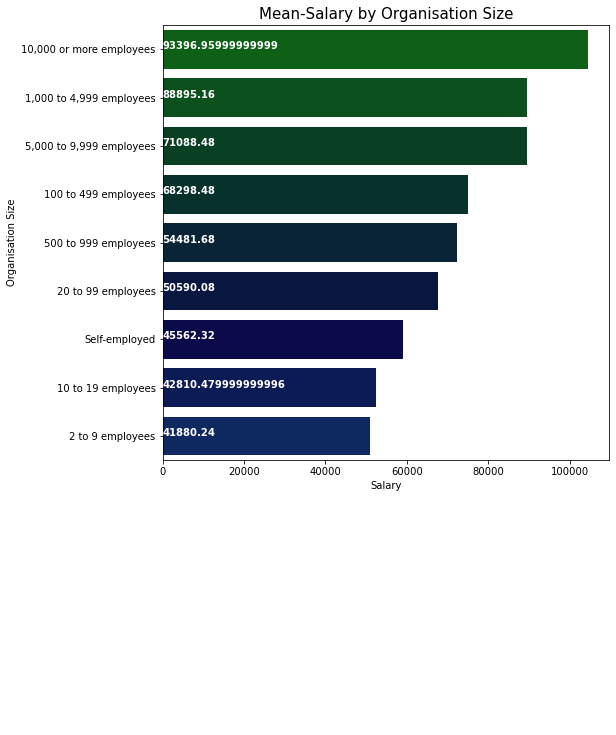

In [47]:
ax=sns.barplot(sal_org.Salary_GBP,sal_org.index,palette=sns.color_palette("ocean",20))
plt.title("Mean-Salary by Organisation Size",size=15)
plt.ylabel("Organisation Size")
plt.xlabel("Salary")
for i, v in enumerate(sal_job.Salary_GBP): 
    ax.text(.5, i, v,fontsize=10,color='white',weight='bold')
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

This graph is a strong indication that bigger organisations tend to pay a lot more in **average** salary than smaller organisations. Which is not very surprising at all!

In [ ]:
df["pop_languages"] = df["LanguageWorkedWith"].str.split(';').str[0]
df["pop_languages_desired"] = df["LanguageDesireNextYear"].str.split(';').str[0]

In [ ]:
f,ax=plt.subplots(1,2,figsize=(25,15))
sns.countplot(y=df["DatabaseWorkedWith"],ax=ax[0],order=df["DatabaseWorkedWith"].value_counts().head(20).index)
ax[0].set_title("Most Popular Databases")
ax[0].set_ylabel('')
sns.countplot(y=df["pop_languages"],ax=ax[1],order=df["pop_languages"].value_counts().head(20).index)
ax[1].set_title("Most Popular Languages")
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.4)
plt.show()

In [ ]:
df["pop_databases_desired"] = df["DatabaseDesireNextYear"].str.split(';').str[0]

In [ ]:
f,ax=plt.subplots(1,2,figsize=(25,15))
sns.countplot(y=df["pop_databases_desired"],ax=ax[0],order=df["pop_databases_desired"].value_counts().head(20).index)
ax[0].set_title("Most Desired Databases")
ax[0].set_ylabel('')
sns.countplot(y=df["pop_languages_desired"],ax=ax[1],order=df["pop_languages_desired"].value_counts().head(20).index)
ax[1].set_title("Most Desired Languages")
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.4)
plt.show()

In [ ]:
df["years_code"]=pd.cut(df["YearsCode"], bins=[0, 10, 20, 30, 40, 50, 60], include_lowest=True)
df["years_code_pro"]=pd.cut(df["YearsCodePro"], bins=[0, 10, 20, 30, 40, 50, 60], include_lowest=True)

In [ ]:
f,ax=plt.subplots(1,2,figsize=(25,15))
sns.countplot(y=df["years_code"],ax=ax[0],order=df["years_code"].value_counts().head(20).index)
ax[0].set_title("Years Coded")
sns.countplot(y=df["years_code_pro"],ax=ax[1],order=df["years_code_pro"].value_counts().head(20).index)
ax[1].set_title("Years Coded Professionally")
plt.subplots_adjust(wspace=0.4)
plt.show()